In [65]:
using PolynomialRoots
using Plots
using LaTeXStrings

In [66]:
function clean_up(array)
    # Clean up resulting array of roots
    # Discard numerical errors (norm > 2) and spit out unique different roots
    x = vec(array)
    xclean = zeros(ComplexF64,0)
    for entry in x
        if abs2(entry) < 100 #? When is it a numerical error?
            append!(xclean, entry)
        end
    end
    return unique(xclean)
end

clean_up (generic function with 1 method)

In [68]:
function filter_reals(array)
    # Only give back real roots
    real_roots = zeros(Float64, 0)
    for entry in array
        if imag(entry) == 0
            append!(real_roots, entry)
        end
    end
    return real_roots
end

filter_reals (generic function with 1 method)

In [101]:
function sample_algebraic_integer(iter, degree, height)
    # Sample 'iter' many roots of a polynomial of 'degree'th degree and height 'Q'
    # The polynomial is of the form x^n + a_{n-1}x^{n-1} + ... + a_1 x + a_0
    # degree = n
    # Leading coefficient is always 1
    # Height is max_i |a_i| of the coefficients.
    raw_roots_deg = zeros(ComplexF64, degree,iter)
    for i in 1:iter
        randomcoeff = [1;rand(collect(-height:height),degree)] # First coefficient is always one
        root_buffer = roots(randomcoeff)
        for j in 1:degree
            raw_roots_deg[j,i]=root_buffer[j]
        end
    end
    return clean_up(raw_roots_deg)
end

sample_algebraic_integer (generic function with 1 method)

In [102]:
function naive_scaling(n_array)
    return [n*3^n for n in n_array]
end

naive_scaling (generic function with 1 method)

# Simulating AlgInts

In [118]:
# aint_{degree}_{height}
aints_2_1 = sample_algebraic_integer(30, 2, 1)
aints_2_2 = sample_algebraic_integer(100, 2, 2)
aints_2_3 = sample_algebraic_integer(300, 2, 3)
aints_2_4 = sample_algebraic_integer(2000, 2, 4);

In [121]:
# aint_{degree}_{height}
aints_10_1 = sample_algebraic_integer(3000, 10, 1)
aints_10_2 = sample_algebraic_integer(10000, 10, 2)
aints_10_3 = sample_algebraic_integer(30000, 10, 3)
aints_10_4 = sample_algebraic_integer(100000, 10, 4);

In [171]:
aints_20_1 = sample_algebraic_integer(250000, 20, 1)
aints_20_4 = sample_algebraic_integer(250000, 20, 4);

## Plotting distribution in the complex plane

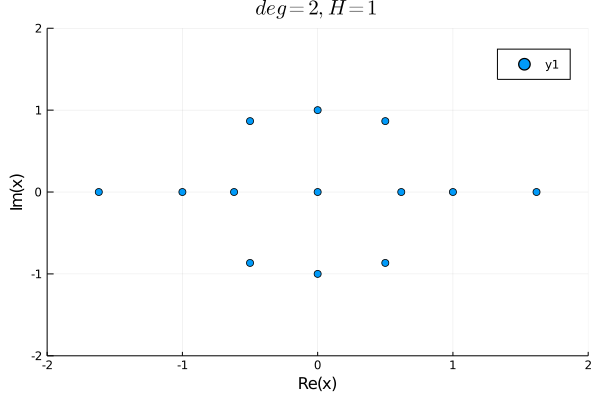

In [126]:
#histogram2d(aints_2_1,bins=(100,50),normed=true,xlim=(-2,2),ylim=(-2,2),title=L"deg=2,H=1")
scatter(aints_2_1,xlim=(-2,2),ylim=(-2,2),title=L"deg=2,H=1")

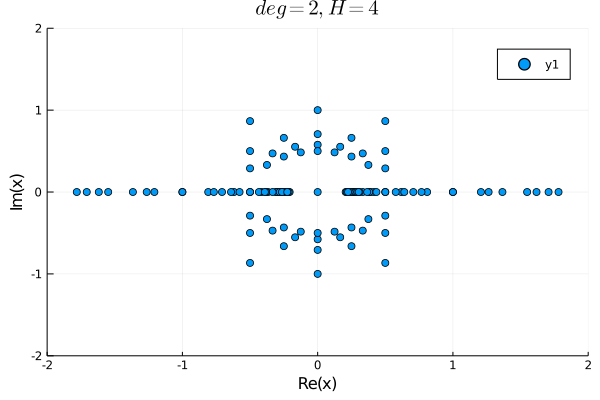

In [127]:
#histogram2d(aints_2_4,bins=(300,100),normed=true,xlim=(-2,2),ylim=(-2,2),title=L"deg=2,H=4")
scatter(aints_2_4,xlim=(-2,2),ylim=(-2,2),title=L"deg=2,H=4")

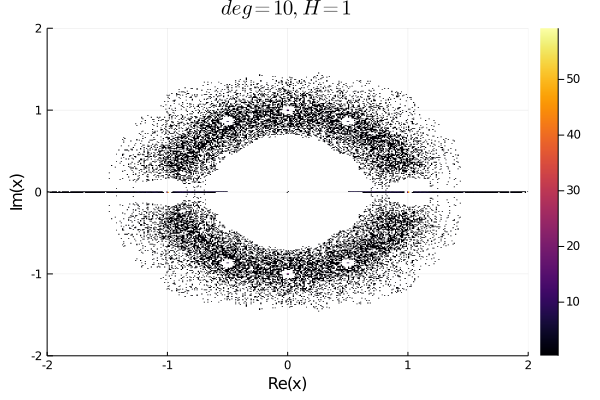

In [140]:
histogram2d(aints_10_1,bins=(500,500),xlim=(-2,2),ylim=(-2,2),normed=true,title=L"deg=10,H=1")

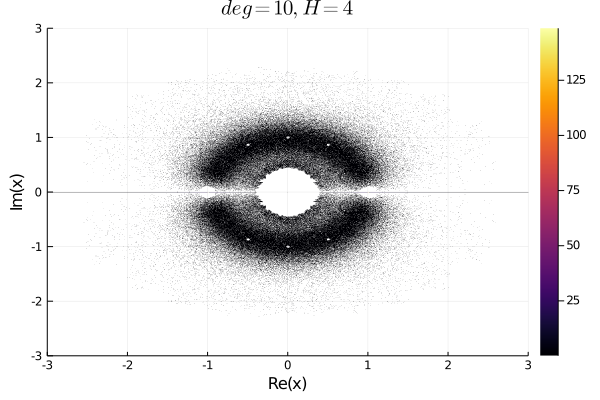

In [139]:
histogram2d(aints_10_4,bins=(3000,3000),xlim=(-3,3),ylim=(-3,3),normed=true,title=L"deg=10,H=4")

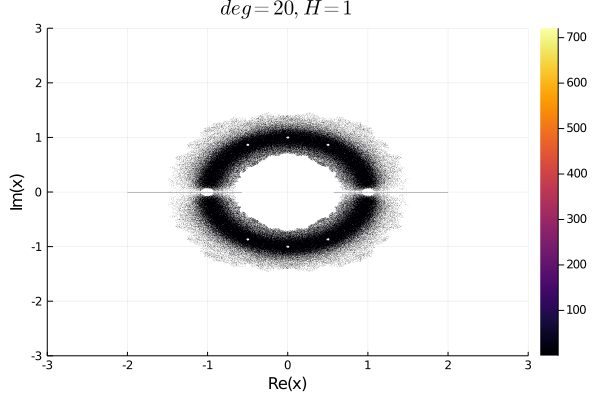

In [172]:
histogram2d(aints_20_1,bins=(3000,3000),xlim=(-2,2),ylim=(-2,2),normed=true,title=L"deg=20,H=1")

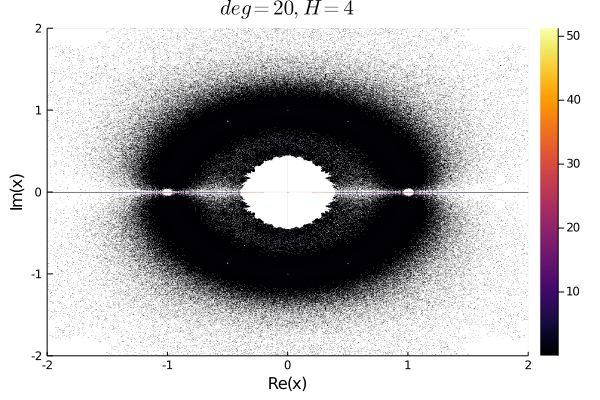

In [173]:
histogram2d(aints_20_4,bins=(3000,3000),xlim=(-2,2),ylim=(-2,2),normed=true,title=L"deg=20,H=4")

## Histogram of radial distribution in complex plane

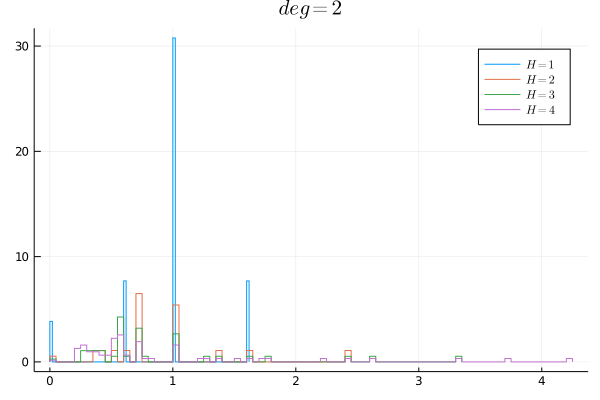

In [166]:
plot([abs(r) for r in aints_2_1],bins=(100),normed=true,seriestype = :stephist,label=L"H=1",title=L"deg=2")
plot!([abs(r) for r in aints_2_2],bins=(100),normed=true,seriestype = :stephist,label=L"H=2")
plot!([abs(r) for r in aints_2_3],bins=(100),normed=true,seriestype = :stephist,label=L"H=3")
plot!([abs(r) for r in aints_2_4],bins=(100),normed=true, seriestype= :stephist,label=L"H=4")


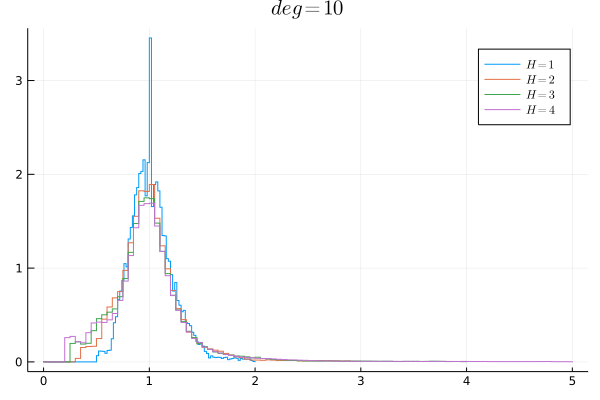

In [167]:
plot([abs(r) for r in aints_10_1],bins=(100),normed=true,seriestype = :stephist,label=L"H=1",title=L"deg=10")
plot!([abs(r) for r in aints_10_2],bins=(100),normed=true,seriestype = :stephist,label=L"H=2")
plot!([abs(r) for r in aints_10_3],bins=(100),normed=true,seriestype = :stephist,label=L"H=3")
plot!([abs(r) for r in aints_10_4],bins=(100),normed=true, seriestype= :stephist,label=L"H=4")

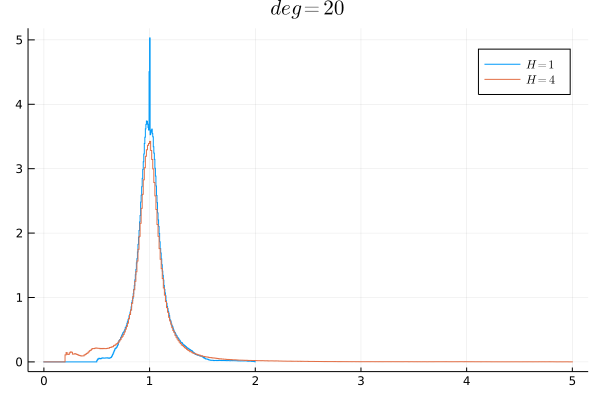

In [175]:
plot([abs(r) for r in aints_20_1],bins=(500),normed=true,seriestype = :stephist,label=L"H=1",title=L"deg=20")
plot!([abs(r) for r in aints_20_4],bins=(500),normed=true, seriestype= :stephist,label=L"H=4")

## Angular distribution in complex plane

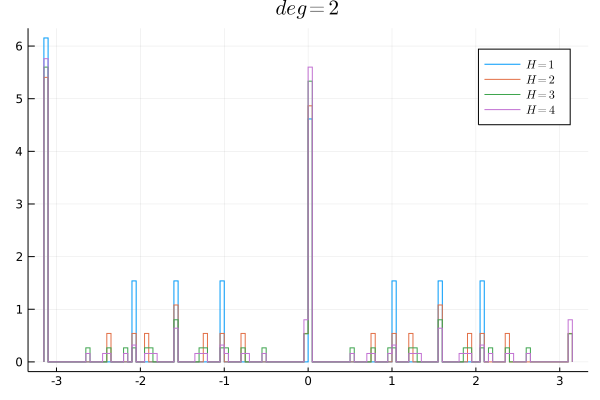

In [170]:
plot([angle(r) for r in aints_2_1],bins=(200),normed=true,seriestype = :stephist,label=L"H=1",title=L"deg=2")
plot!([angle(r) for r in aints_2_2],bins=(200),normed=true,seriestype = :stephist,label=L"H=2")
plot!([angle(r) for r in aints_2_3],bins=(200),normed=true,seriestype = :stephist,label=L"H=3")
plot!([angle(r) for r in aints_2_4],bins=(200),normed=true, seriestype= :stephist,label=L"H=4")

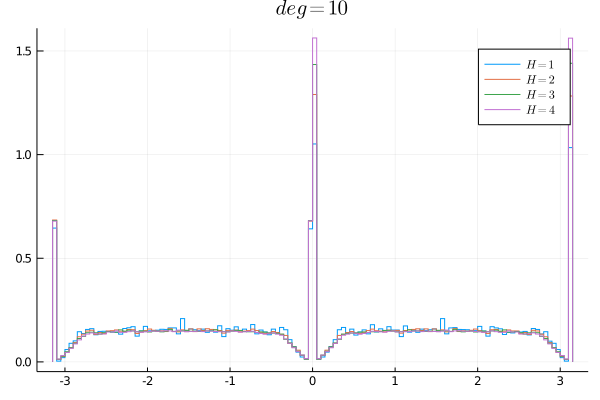

In [169]:
plot([angle(r) for r in aints_10_1],bins=(200),normed=true,seriestype = :stephist,label=L"H=1",title=L"deg=10")
plot!([angle(r) for r in aints_10_2],bins=(200),normed=true,seriestype = :stephist,label=L"H=2")
plot!([angle(r) for r in aints_10_3],bins=(200),normed=true,seriestype = :stephist,label=L"H=3")
plot!([angle(r) for r in aints_10_4],bins=(200),normed=true, seriestype= :stephist,label=L"H=4")

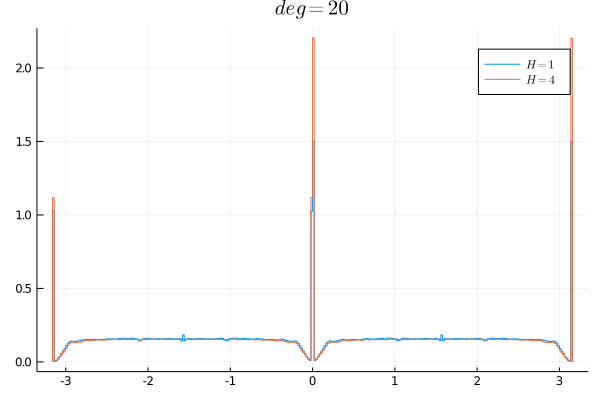

In [177]:
plot([angle(r) for r in aints_20_1],bins=(500),normed=true,seriestype = :stephist,label=L"H=1",title=L"deg=20")
plot!([angle(r) for r in aints_20_4],bins=(500),normed=true, seriestype= :stephist,label=L"H=4")

## Distribution of purely real roots

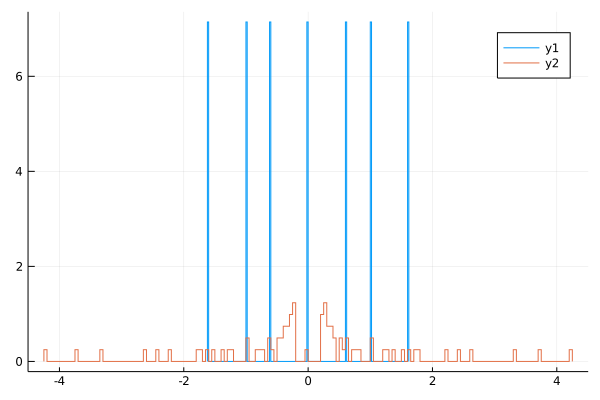

In [187]:
plot(filter_reals(aints_2_1),normed=true,bins=(250),seriestype = :stephist)
plot!(filter_reals(aints_2_4),normed=true,bins=(250),seriestype = :stephist)

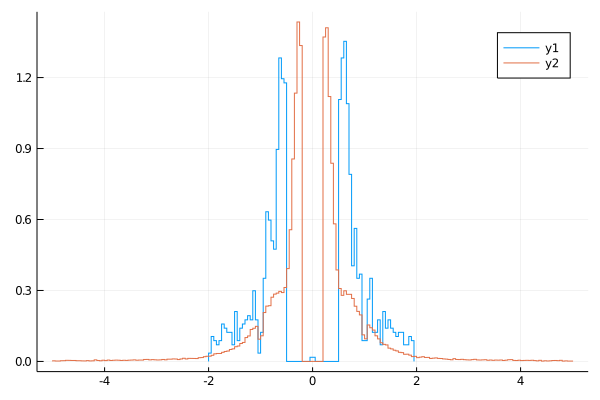

In [190]:
plot(filter_reals(aints_10_1),normed=true,bins=(100),seriestype = :stephist)
plot!(filter_reals(aints_10_4),normed=true,bins=(250),seriestype = :stephist)

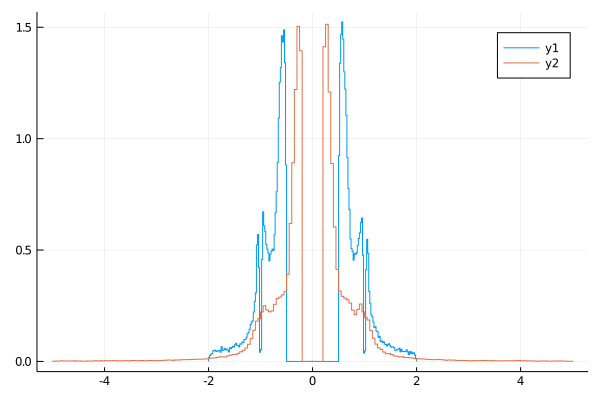

In [192]:
plot(filter_reals(aints_20_1),normed=true,bins=(250),seriestype = :stephist)
plot!(filter_reals(aints_20_4),normed=true,bins=(250),seriestype = :stephist)